 ## Домашнее задание Проверка гипотез

In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [3]:
def check_normality(data):
    '''
    Для проверки на нормальность распределения бвоспользуемся критерием Шапиро-Уилка
    Н0: Данные распределены нормально
    Н1: Данные распределены не нормально
    '''
    results = st.shapiro(data)
    p_val = results[1]
    print(f'р-значение: {p_val:.4f}')
    if p_val < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [4]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

Применим t-тест Стьюдента, чтобы проверить эти выборки  
Н0: различий между выборками нет  
Н1: Выборки различаются

In [35]:
stat, p_val = st.ttest_ind(mens, womens)
print(f"Статистика = {stat:.5f}, p = {p_val:.5e}")

if p_val > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 28.31364, p = 4.01305e-176
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Посмотрим на их распределение графически и сравним среднии этих наборов

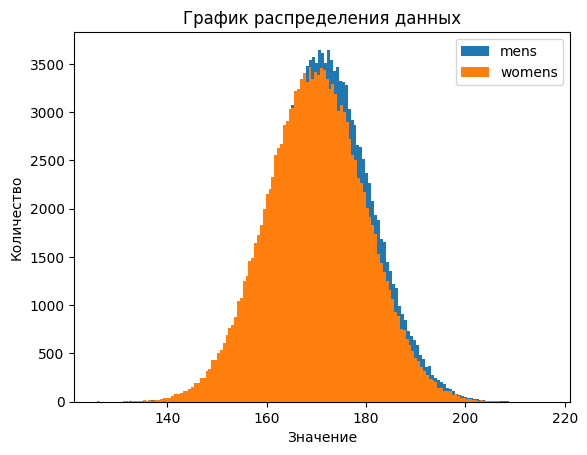

In [6]:
plt.hist(mens, bins=150)
plt.hist(womens, bins=150)
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.legend(['mens','womens'])
plt.title('График распределения данных')
plt.show()

In [56]:
print('Средний рост мужчин', np.mean(mens))
print('Средний рост женщин', np.mean(womens))

Средний рост мужчин 171.01834593701406
Средний рост женщин 169.98458452269782


P-значение очень низкое, при этом средние и распределения слабо отличаются друг от друга, возможно данные слишком большие по размеру.
Возьмем из кождой группы по 50 случайных значений и проверим, используя t-тест

In [116]:
choice_mens = np.random.choice(mens, 50)
choice_womens = np.random.choice(womens, 50)
print('Средний рост мужчин', np.mean(choice_mens))
print('Средний рост женщин', np.mean(choice_womens))

Средний рост мужчин 169.96879903408478
Средний рост женщин 168.46248381408898


In [117]:
stat, p_val = st.ttest_ind(choice_mens, choice_womens)
print(f"Статистика = {stat:.5f}, p = {p_val:.5e}")

if p_val > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 0.76372, p = 4.46870e-01
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


p-значение превышает уровень значимости и средние, вероятно, одинаковые

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [7]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [8]:
check_normality(test_team)

р-значение: 0.0046
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [9]:
check_normality(developer_team)

р-значение: 0.0005
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Тесты показывают, что данные распределены не нормально, визуализируем данные

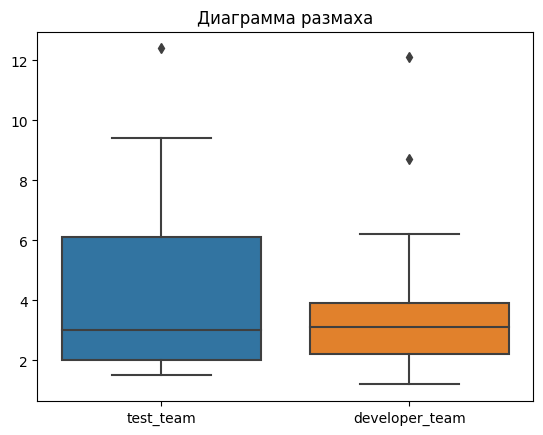

In [10]:
sns.boxplot([test_team, developer_team])
plt.xticks([0,1],['test_team', 'developer_team'])
plt.title('Диаграмма размаха')
plt.show()

Распределения асимметричны, к тому же имеют выбросы, поэтому для проверки комманд используем непараметрический тест Манна-Уитни.

Н0: распределения одинаковые  
Н1: распределения различаются

In [11]:
stat, p = st.mannwhitneyu(test_team, developer_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 151.50000, p = 0.82265
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Вероятно, нет разницы между сверхурочной работой команд разработки и тестирования

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [12]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 
               768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 
                895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 
                919.1 , 1160.5, 996.9]
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 
        805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 
        823.6, 818.7, 926.8, 791.7, 948.3]

Чтобы проверить разницу в этих трех группах используем однофакторный дисперсионный анализ, для этого выборки должны быть независимы, среднеквадратические отклонения - равны и распределены нормальны. Выборки - независимы, т.к. взяты разные группы детей, не связанные друг с другом. Проверим выборки на нормальность.

In [14]:
# Распределение первой группы: 
check_normality(only_breast)

р-значение: 0.4694
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [15]:
#Распределение второй группы
check_normality(only_formula)

р-значение: 0.8879
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [16]:
# Распределение третьей группы 
check_normality(both)

р-значение: 0.7973
Не отклоняем нулевую гипотезу >> Данные распределены нормально


Все три группы распределены нормально. Проверим их среднеквадратические отклонения.

In [20]:
print('Первой группы:', np.std(only_breast))
print('Второй группы:', np.std(only_formula))
print('Третьей группы:', np.std(both))

Первой группы: 98.96138598946065
Второй группы: 86.78100242721023
Третьей группы: 78.10417719478326


А вот среднеквадратические отклонения различаются, тогда применим тест Александера-Говерна, которы проверяет равенство средних нескольких выборок при неоднородной дисперсии, хотя при этом тесте потеряется мощность.  
Определим гипотезы:  
Н0 - средние всех выборок равны  
Н1 - средняя хотя бы одной выборки отличается

In [32]:
results = st.alexandergovern(only_breast, only_formula, both)

print(f"Статистика = {results.statistic:.5f}, p = {results.pvalue:.5e}")

if results.pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, среднии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, среднии, вероятно, различаются')

Статистика = 20.11332, p = 4.28990e-05
Отклоняем нулевую гипотезу, среднии, вероятно, различаются


одна или все группы отличаются друг от друга, посмотрим на их средние

In [31]:
print('Среднее первой группы:', np.mean(only_breast))
print('Среднее второй группы:', np.mean(only_formula))
print('Среднее третьей группы:', np.mean(both))

Первой группы: 749.8235294117648
Второй группы: 959.2157894736845
Третьей группы: 809.9521739130436


Чтобы сравнить попарно применим тест Тьюки к этим трем группам

In [34]:
print(st.tukey_hsd(only_breast, only_formula, both))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -209.392     0.000  -281.434  -137.351
 (0 - 2)    -60.129     0.100  -129.149     8.891
 (1 - 0)    209.392     0.000   137.351   281.434
 (1 - 2)    149.264     0.000    82.365   216.162
 (2 - 0)     60.129     0.100    -8.891   129.149
 (2 - 1)   -149.264     0.000  -216.162   -82.365



P-значение при срвнении первой и третьей группы превышает уровень значимости, вероятно, средние этих групп не различаются, при этом при  сравнении первой и второй и третьей и второй групп р-значение ниже уровня знаяимости, значит в этих случаях можем отклонить Н0.  
Таким образом, вероятно, изменения в весе детей только на искусственном вскармливании отличаются от весовых изменений детей на грудном и смешанном типе питания.ч